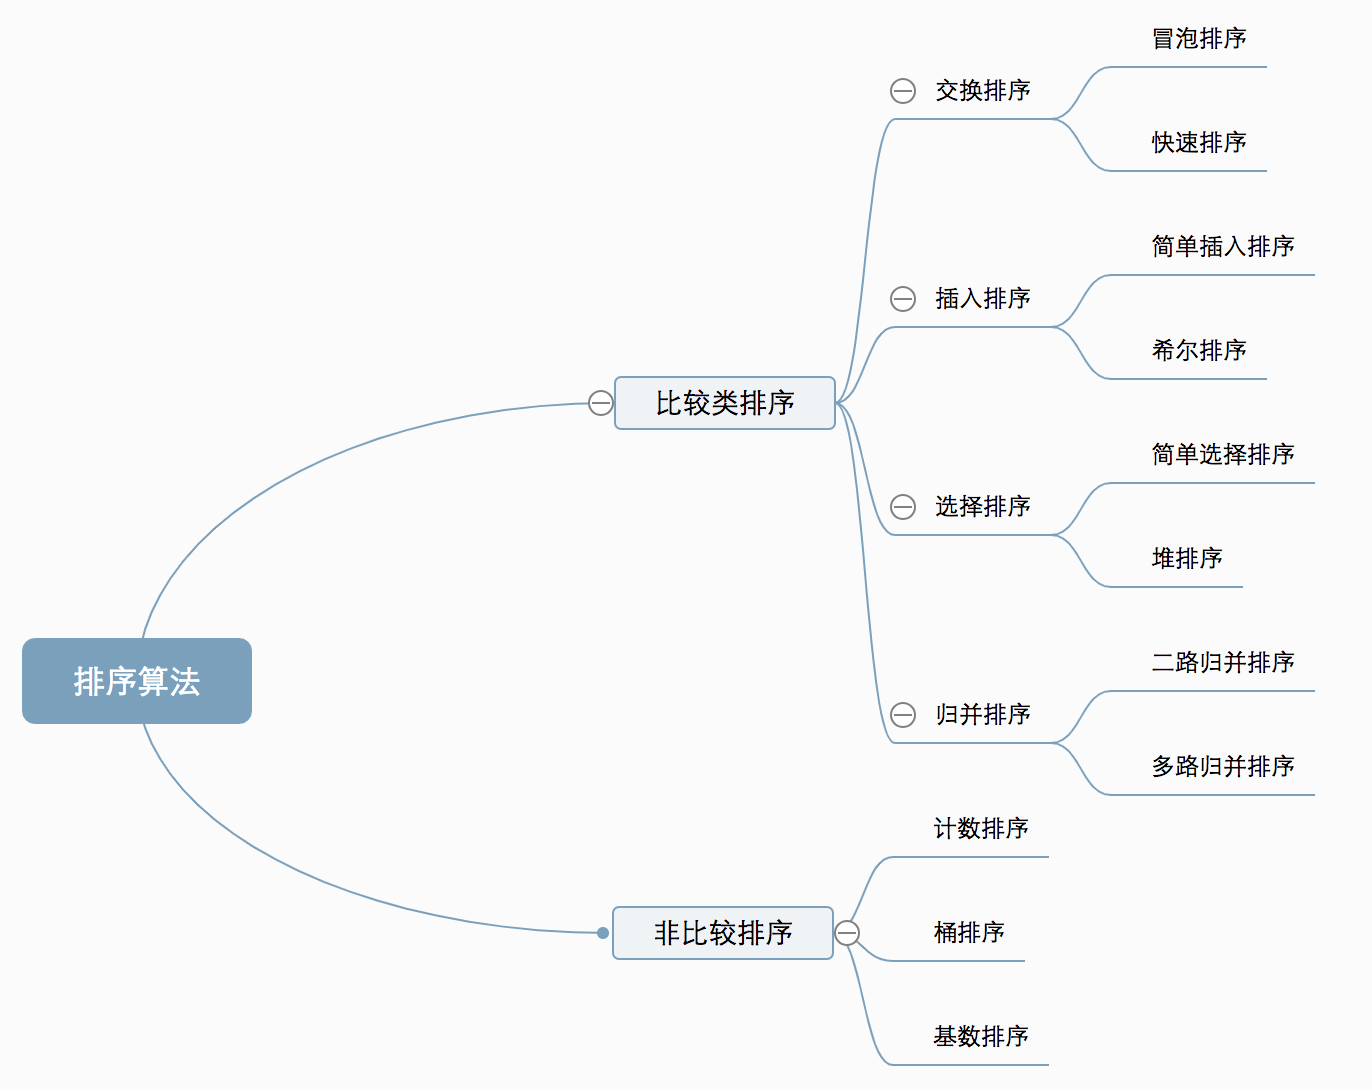
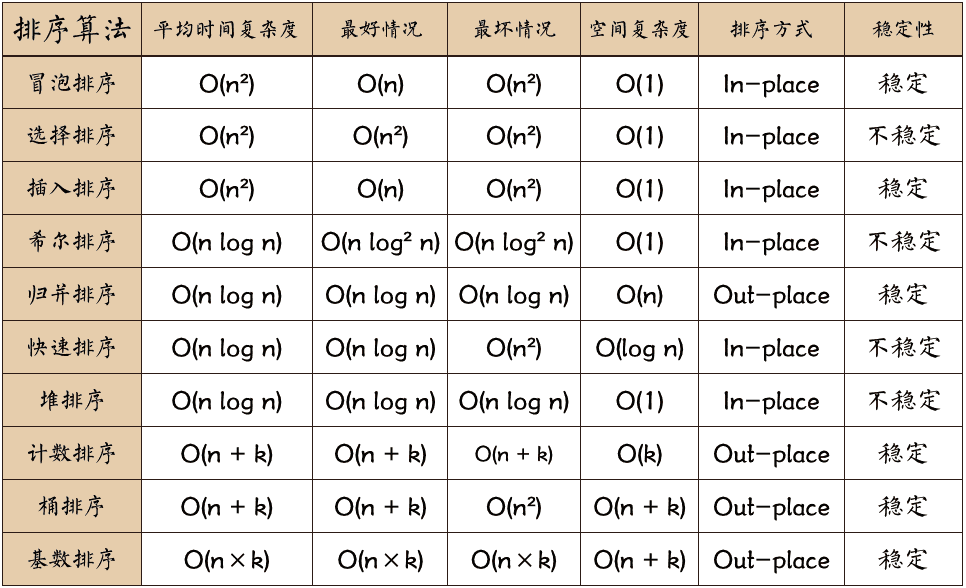

In [ ]:
"""
关于时间复杂度：
  平方阶 (O(n2)) 排序 各类简单排序：直接插入、直接选择和冒泡排序。
  线性对数阶 (O(nlog2n)) 排序 快速排序、堆排序和归并排序；
  O(n1+§)) 排序，§ 是介于 0 和 1 之间的常数。希尔排序
  线性阶 (O(n)) 排序 基数排序，此外还有桶、箱排序。

关于稳定性：
  排序后 2 个相等键值的顺序和排序之前它们的顺序相同
  稳定的排序算法：冒泡排序、插入排序、归并排序和基数排序。
  不是稳定的排序算法：选择排序、快速排序、希尔排序、堆排序。

名词解释：
  n：数据规模
  k：“桶”的个数
  In-place：占用常数内存，不占用额外内存
  Out-place：占用额外内存
  """

In [3]:
%%time
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
#%matplotlib notebook

Wall time: 0 ns


In [5]:
%%time
"""
1.冒泡排序（Bubble Sort）也是一种简单直观的排序算法。它重复地走访过要排序的数列，一次比较两个元素，
如果他们的顺序错误就把他们交换过来。走访数列的工作是重复地进行直到没有再需要交换，也就是说该数列已经
排序完成。这个算法的名字由来是因为越小的元素会经由交换慢慢“浮”到数列的顶端。

算法步骤
  比较相邻的元素。如果第一个比第二个大，就交换他们两个。
  对每一对相邻元素作同样的工作，从开始第一对到结尾的最后一对。这步做完后，最后的元素会是最大的数。
  针对所有的元素重复以上的步骤，除了最后一个。
  持续每次对越来越少的元素重复上面的步骤，直到没有任何一对数字需要比较。
"""

def bubble_sort(arr):
    for i in range(1, len(arr)):
        for j in range(0, len(arr)-i):
            if arr[j] > arr[j+1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]  
    return arr


numbers = np.random.randint(10000,size=10000)
print(numbers)
%time bubble_sort(numbers)
print(numbers)

[ 526 6462 6698 ...  939 8034 7582]
Wall time: 35.1 s
[   4    6    7 ... 9997 9998 9998]
Wall time: 35.1 s


In [ ]:
"""
2.选择排序(Selection Sort)是一种简单直观的排序算法，无论什么数据进去都是 O(n²) 的时间复杂度。
所以用到它的时候，数据规模越小越好。唯一的好处可能就是不占用额外的内存空间了吧。

算法步骤
  首先在未排序序列中找到最小（大）元素，存放到排序序列的起始位置
  再从剩余未排序元素中继续寻找最小（大）元素，然后放到已排序序列的末尾。
  重复第二步，直到所有元素均排序完毕。
"""
def selection_sort(arr):
    for i in range(len(arr) - 1):
        # 记录最小数的索引
        minIndex = i
        for j in range(i + 1, len(arr)):
            minIndex = j if arr[j] < arr[minIndex] else go #找到最小数索引赋值minIndes

        # arr[i] 和 最小数 arr[minIndex] 进行交换
        arr[i], arr[minIndex] = arr[minIndex], arr[i] #if i != minIndex else go
            
    return arr

numbers = np.random.randint(100,size=20)
print(numbers)
bubble_sort(numbers)
print(numbers)

In [ ]:
"""
3.插入排序(Insertion Sort)的代码实现虽然没有冒泡排序和选择排序那么简单粗暴，
但它的原理应该是最容易理解的了，因为只要打过扑克牌的人都应该能够秒懂。插入排序是
一种最简单直观的排序算法，它的工作原理是通过构建有序序列，对于未排序数据，在已排
序序列中从后向前扫描，找到相应位置并插入。

插入排序和冒泡排序一样，也有一种优化算法，叫做拆半插入。

算法步骤
  将第一待排序序列第一个元素看做一个有序序列，把第二个元素到最后一个元素当成是未排序序列。
  从头到尾依次扫描未排序序列，将扫描到的每个元素插入有序序列的适当位置。
  （如果待插入的元素与有序序列中的某个元素相等，则将待插入元素插入到相等元素的后面。）
"""
def insertion_sort(arr):
    for i in range(len(arr)):
        preIndex = i-1
        current = arr[i]
        while preIndex >= 0 and arr[preIndex] > current:
            arr[preIndex+1] = arr[preIndex]
            preIndex-=1
        arr[preIndex+1] = current
    return arr

numbers = np.random.randint(100,size=20)
print(numbers)
bubble_sort(numbers)
print(numbers)

In [ ]:
"""
4.希尔排序(Shell Sort)，也称递减增量排序算法，是插入排序的一种更高效的改进版本。
但希尔排序是非稳定排序算法。
希尔排序是基于插入排序的以下两点性质而提出改进方法的：
  插入排序在对几乎已经排好序的数据操作时，效率高，即可以达到线性排序的效率；
  但插入排序一般来说是低效的，因为插入排序每次只能将数据移动一位；
  希尔排序的基本思想是：先将整个待排序的记录序列分割成为若干子序列分别进行直接插入排序，
  待整个序列中的记录“基本有序”时，再对全体记录进行依次直接插入排序。

算法步骤
  选择一个增量序列 t1，t2，……，tk，其中 ti > tj, tk = 1；
  按增量序列个数 k，对序列进行 k 趟排序；
  每趟排序，根据对应的增量 ti，将待排序列分割成若干长度为 m 的子序列，分别对各子表进行
  直接插入排序。仅增量因子为 1 时，整个序列作为一个表来处理，表长度即为整个序列的长度。
"""
def shellSort(arr):
    import math
    gap=1
    while(gap < len(arr)/3):
        gap = gap*3+1
    while gap > 0:
        for i in range(gap,len(arr)):
            temp = arr[i]
            j = i-gap
            while j >=0 and arr[j] > temp:
                arr[j+gap]=arr[j]
                j-=gap
            arr[j+gap] = temp
        gap = math.floor(gap/3)
    return arr

In [ ]:
"""
5.归并排序（Merge sort）是建立在归并操作上的一种有效的排序算法。该算法是采用
分治法（Divide and Conquer）的一个非常典型的应用。作为一种典型的分而治之
思想的算法应用，归并排序的实现由两种方法：
  自上而下的递归（所有递归的方法都可以用迭代重写，所以就有了第 2 种方法）
  自下而上的迭代
和选择排序一样，归并排序的性能不受输入数据的影响，但表现比选择排序好的多，因为
始终都是 O(nlogn) 的时间复杂度。代价是需要额外的内存空间。

算法步骤
  申请空间，使其大小为两个已经排序序列之和，该空间用来存放合并后的序列；
  设定两个指针，最初位置分别为两个已经排序序列的起始位置；
  比较两个指针所指向的元素，选择相对小的元素放入到合并空间，并移动指针到下一位置；
  重复步骤 3 直到某一指针达到序列尾；
  将另一序列剩下的所有元素直接复制到合并序列尾。
"""
def mergeSort(arr):
    import math
    if(len(arr)<2):
        return arr
    middle = math.floor(len(arr)/2)
    left, right = arr[0:middle], arr[middle:]
    return merge(mergeSort(left), mergeSort(right))

def merge(left,right):
    result = []
    while left and right:
        if left[0] <= right[0]:
            result.append(left.pop(0));
        else:
            result.append(right.pop(0));
    while left:
        result.append(left.pop(0));
    while right:
        result.append(right.pop(0));
    return result

In [ ]:
"""
6.快速排序(Quick Sort)是由东尼·霍尔所发展的一种排序算法。在平均状况下，排序 n 个项目
要 Ο(nlogn) 次比较。在最坏状况下则需要 Ο(n2) 次比较，但这种状况并不常见。事实上，
快速排序通常明显比其他 Ο(nlogn) 算法更快，因为它的内部循环（inner loop）可以在大部
分的架构上很有效率地被实现出来。
快速排序使用分治法（Divide and conquer）策略来把一个串行（list）分为两个子串行（sub-lists）。

快速排序又是一种分而治之思想在排序算法上的典型应用。本质上来看，快速排序应该算是在冒泡排序基础上
的递归分治法。

快速排序的名字起的是简单粗暴，因为一听到这个名字你就知道它存在的意义，就是快，而且效率高！它是处理大
数据最快的排序算法之一了。虽然 Worst Case 的时间复杂度达到了 O(n²)，但是人家就是优秀，在大多数情况
下都比平均时间复杂度为 O(n logn) 的排序算法表现要更好，可是这是为什么呢：
  快速排序的最坏运行情况是 O(n²)，比如说顺序数列的快排。但它的平摊期望时间是 O(nlogn)，
  且 O(nlogn) 记号中隐含的常数因子很小，比复杂度稳定等于 O(nlogn) 的归并排序要小很多。
  所以，对绝大多数顺序性较弱的随机数列而言，快速排序总是优于归并排序。

算法步骤
  从数列中挑出一个元素，称为 “基准”（pivot）;
  重新排序数列，所有元素比基准值小的摆放在基准前面，所有元素比基准值大的摆在基准的后面（相同的数可以
  到任一边）。在这个分区退出之后，该基准就处于数列的中间位置。这个称为分区（partition）操作；
  递归地（recursive）把小于基准值元素的子数列和大于基准值元素的子数列排序；

  递归的最底部情形，是数列的大小是零或一，也就是永远都已经被排序好了。虽然一直递归下去，但是这个算法总
  会退出，因为在每次的迭代（iteration）中，它至少会把一个元素摆到它最后的位置去。
"""
def quickSort(arr, left=None, right=None):
    left = 0 if not isinstance(left,(int, float)) else left
    right = len(arr)-1 if not isinstance(right,(int, float)) else right
    if left < right:
        partitionIndex = partition(arr, left, right)
        quickSort(arr, left, partitionIndex-1)
        quickSort(arr, partitionIndex+1, right)
    return arr

def partition(arr, left, right):
    pivot = left
    index = pivot+1
    i = index
    while  i <= right:
        if arr[i] < arr[pivot]:
            swap(arr, i, index)
            index+=1
        i+=1
    swap(arr,pivot,index-1)
    return index-1

def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

In [ ]:
"""
7.堆排序（Heap Sort）是指利用堆这种数据结构所设计的一种排序算法。
堆积是一个近似完全二叉树的结构，并同时满足堆积的性质：即子结点的键值或索引
总是小于（或者大于）它的父节点。堆排序可以说是一种利用堆的概念来排序的选择排序。
分为两种方法：
  大顶堆：每个节点的值都大于或等于其子节点的值，在堆排序算法中用于升序排列；
  小顶堆：每个节点的值都小于或等于其子节点的值，在堆排序算法中用于降序排列；

堆排序的平均时间复杂度为 Ο(nlogn)。

算法步骤
  创建一个堆 H[0……n-1]；
  把堆首（最大值）和堆尾互换；
  把堆的尺寸缩小 1，并调用 shift_down(0)，目的是把新的数组顶端数据调整到相应位置；
  重复步骤 2，直到堆的尺寸为 1。
"""
def buildMaxHeap(arr):
    import math
    for i in range(math.floor(len(arr)/2),-1,-1):
        heapify(arr,i)

def heapify(arr, i):
    left = 2*i+1
    right = 2*i+2
    largest = i
    if left < arrLen and arr[left] > arr[largest]:
        largest = left
    if right < arrLen and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        swap(arr, i, largest)
        heapify(arr, largest)

def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

def heapSort(arr):
    global arrLen
    arrLen = len(arr)
    buildMaxHeap(arr)
    for i in range(len(arr)-1,0,-1):
        swap(arr,0,i)
        arrLen -=1
        heapify(arr, 0)
    return arr

In [ ]:
"""
8.计数排序(Counting Sort)的核心在于将输入的数据值转化为键存储在额外开辟的数组空间中。
作为一种线性时间复杂度的排序，计数排序要求输入的数据必须是有确定范围的整数
"""
def countingSort(arr, maxValue):
    bucketLen = maxValue+1
    bucket = [0]*bucketLen
    sortedIndex =0
    arrLen = len(arr)
    for i in range(arrLen):
        if not bucket[arr[i]]:
            bucket[arr[i]]=0
        bucket[arr[i]]+=1
    for j in range(bucketLen):
        while bucket[j]>0:
            arr[sortedIndex] = j
            sortedIndex+=1
            bucket[j]-=1
    return arr

In [ ]:
"""
9.桶(Bucket Sort)排序是计数排序的升级版。它利用了函数的映射关系，高效与否的关键就在于这个映射函数的确定。
为了使桶排序更加高效，我们需要做到这两点：
  在额外空间充足的情况下，尽量增大桶的数量
  使用的映射函数能够将输入的 N 个数据均匀的分配到 K 个桶中
  同时，对于桶中元素的排序，选择何种比较排序算法对于性能的影响至关重要。

什么时候最快: 当输入的数据可以均匀的分配到每一个桶中。
什么时候最慢: 当输入的数据被分配到了同一个桶中。
"""
def bucket_sort(s):
    """桶排序"""
    min_num = min(s)
    max_num = max(s)
    # 桶的大小
    bucket_range = (max_num-min_num) / len(s)
    # 桶数组
    count_list = [ [] for i in range(len(s) + 1)]
    # 向桶数组填数
    for i in s:
        count_list[int((i-min_num)//bucket_range)].append(i)
    s.clear()
    # 回填，这里桶内部排序直接调用了sorted
    for i in count_list:
        for j in sorted(i):
            s.append(j)

In [ ]:
"""
10.基数排序是一种非比较型整数排序算法，其原理是将整数按位数切割成不同的数字，然后按每个位数分别比较。
由于整数也可以表达字符串（比如名字或日期）和特定格式的浮点数，所以基数排序也不是只能使用于整数。

基数排序 vs 计数排序 vs 桶排序

这三种排序算法都利用了桶的概念，但对桶的使用方法上有明显差异：
  基数排序：根据键值的每位数字来分配桶；
  计数排序：每个桶只存储单一键值；
  桶排序：每个桶存储一定范围的数值；
"""
def RadixSort(list):
    i = 0       #初始为个位排序
    n = 1       #最小的位数置为1（包含0）
    max_num = max(list) #得到带排序数组中最大数
    while max_num > 10**n: #得到最大数是几位数
        n += 1
    while i < n:
        bucket = {} #用字典构建桶
        for x in range(10):
            bucket.setdefault(x, []) #将每个桶置空
        for x in list: #对每一位进行排序
            radix =int((x / (10**i)) % 10) #得到每位的基数
            bucket[radix].append(x) #将对应的数组元素加入到相 #应位基数的桶中
        j = 0
        for k in range(10):
            if len(bucket[k]) != 0: #若桶不为空
                for y in bucket[k]: #将该桶中每个元素
                    list[j] = y #放回到数组中
                    j += 1
        i += 1
return  list

In [ ]:

num_list = [4, 7, 0, 6]
plt.bar(range(len(num_list)), num_list)
plt.show()

In [ ]:
%matplotlib notebook
#生成随机数组
numbers = np.random.randint(100,size=15)
numbers[5] = ''
n100 = np.full(15,100)
#np.random.shuffle(numbers)
face = np.arange(1, 16)

#条形图动画显示
fig, ax = plt.subplots() #figsize=(20,10)) #长：宽 = 21：11
#fig2, ax2 = plt.subplots()

bar1 = ax.bar(face, n100, facecolor='w')

bar2 = ax.bar(face, numbers, facecolor='DarkSeaGreen', bottom = n100)
for x, y in zip(face, numbers+100):
    ax.text(x+0.05,y+0.05,'%i'%(y-100), ha='center',va='top', color='DodgerBlue')

ax.grid(which='major', axis='y', linestyle='-', color='DarkSeaGreen')


"""
def draw_bar():
    global face, numbers
    ax.clear()
    
    ax.bar(face, numbers, facecolor='DarkSeaGreen')
    for x, y in zip(face, numbers):
        ax.text(x+0.05,y+0.05,'%i'%y, ha='center',va='bottom', color='DarkSeaGreen')

    plt.title('Bubble Sort', fontsize=24, color='DodgerBlue')
    #plt.yticks(())
    plt.xticks(())  

    ax.grid(which='major', axis='y', linestyle='-', color='DarkSeaGreen')
    
    plt.box(False)
    
    
def init():
    draw_bar()
    ax.text(1, 0.4, 0, transform=ax.transAxes, color='#777777', 
            size=46, ha='right', weight=800)
    
def update_bar(n):
    draw_bar()
    ax.text(1, 0.4, n, transform=ax.transAxes, color='#777777', 
            size=46, ha='right', weight=800)

    
def bubble_sort():
    global face, numbers
    n = 0
    for i in range(1, len(numbers)):
        for j in range(0, len(numbers)-i):
            if numbers[j] > numbers[j+1]:
                numbers[j], numbers[j + 1] = numbers[j + 1], numbers[j]
                n += 1
                yield n
    return n

            
ani = animation.FuncAnimation(fig, update_bar, frames = bubble_sort, 
                              interval = 50, init_func=init, blit=False)

"""
plt.show()
#ani.save('bubble.gif', writer='pillow', fps=100)
#HTML(ani.to_jshtml())

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x)
l = ax.plot(x, y)
dot, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return l

def gen_dot():
    for i in np.linspace(0, 2*np.pi, 400):
        newdot = [i, np.sin(i)]
        yield newdot

def update_dot(newd):
    dot.set_data(newd[0], newd[1])
    return dot,

ani = animation.FuncAnimation(fig, update_dot, frames = gen_dot, 
                              interval = 20, init_func=init, blit=False)
#ani.save('sin_dot.gif', writer='pillow', fps=60)
plt.show()
#HTML(ani.to_jshtml())


<IPython.core.display.Javascript object>


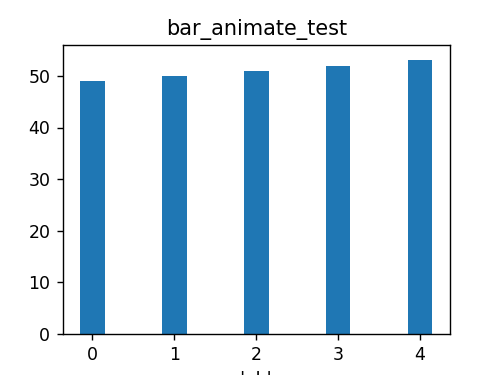

[[0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8], [5, 6, 7, 8, 9], [6, 7, 8, 9, 10], [7, 8, 9, 10, 11], [8, 9, 10, 11, 12], [9, 10, 11, 12, 13], [10, 11, 12, 13, 14], [11, 12, 13, 14, 15], [12, 13, 14, 15, 16], [13, 14, 15, 16, 17], [14, 15, 16, 17, 18], [15, 16, 17, 18, 19], [16, 17, 18, 19, 20], [17, 18, 19, 20, 21], [18, 19, 20, 21, 22], [19, 20, 21, 22, 23], [20, 21, 22, 23, 24], [21, 22, 23, 24, 25], [22, 23, 24, 25, 26], [23, 24, 25, 26, 27], [24, 25, 26, 27, 28], [25, 26, 27, 28, 29], [26, 27, 28, 29, 30], [27, 28, 29, 30, 31], [28, 29, 30, 31, 32], [29, 30, 31, 32, 33], [30, 31, 32, 33, 34], [31, 32, 33, 34, 35], [32, 33, 34, 35, 36], [33, 34, 35, 36, 37], [34, 35, 36, 37, 38], [35, 36, 37, 38, 39], [36, 37, 38, 39, 40], [37, 38, 39, 40, 41], [38, 39, 40, 41, 42], [39, 40, 41, 42, 43], [40, 41, 42, 43, 44], [41, 42, 43, 44, 45], [42, 43, 44, 45, 46], [43, 44, 45, 46, 47], [44, 45, 46, 47, 48], [45, 46, 47, 48, 49], [46, 47, 48, 49, 50], [47, 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

 
fig=plt.figure(1,figsize=(4,3))

ax=fig.add_subplot(111)
ax.set_title('bar_animate_test')

#ax.set_xticks([])注释了这个是能看到变化，要不看不到变化，不对，能看到变化，去了注释吧
#ax.set_yticks([])
ax.set_xlabel('xlable')

N=5
frames=50
x=np.arange(N)
 
collection=[]
collection.append([i for i in x])

for i in range(frames):
    collection.append([ci+1 for ci in collection[i]])
    
print(collection)

xstd=[0,1,2,3,4]

bars=ax.bar(x,collection[0],0.30)

def animate(fi):    
    # collection=[i+1 for i in x]
    ax.set_ylim(0,max(collection[fi])+3)  #对于问题3，添加了这个
    
    for rect ,yi in zip(bars,collection[fi]):
        rect.set_height(yi)
        
    # bars.set_height(collection)
    return bars


anim=animation.FuncAnimation(fig,animate,frames=frames,interval=10,repeat=False)

plt.show()